In [2]:
class PIDController:
    def __init__(self, kp, ki, kd):
        self.kp = kp  # 比例增益
        self.ki = ki  # 积分增益
        self.kd = kd  # 微分增益

        self.last_error = 0  # 上一次的误差
        self.integral = 0  # 积分项

    def compute(self, setpoint, process_variable, dt):
        error = setpoint - process_variable  # 计算误差

        self.integral += error * dt  # 积分项累加

        derivative = (error - self.last_error) / dt  # 微分项计算

        output = (self.kp * error) + (self.ki * self.integral) + (self.kd * derivative)  # PID控制输出

        self.last_error = error  # 保存当前误差作为下一次的上一次误差

        return output


<AxesSubplot:>

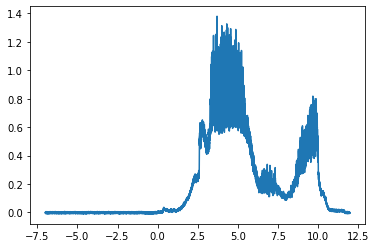

In [10]:
import data_access as da
Da = da.get_one_shot_one_signal(125383,'dal6')
Da.plot()

In [30]:
control_outputs = []
process_variables = []


# 创建PID控制器对象
pid = PIDController(kp=0.1, ki=0.2, kd=0.1)

# 设定目标值
setpoint = 0.5

# 模拟过程中的实际值（可以根据实际情况修改）
# process_variable = 0.5

# 模拟时间步长
dt = 0.001

# 模拟PID控制过程
for i,process_variable in enumerate(Da.loc[0:].values):
    # 使用PID控制器计算输出
    if process_variable > setpoint:
        control_output = max(0,pid.compute(setpoint, process_variable, dt))
    else:
        control_output = 0
    # 模拟控制信号对过程进行调节
    # process_variable += control_output

    # 打印当前控制输出和过程变量
    control_outputs.append(control_output)
    process_variables.append(process_variable)
    print(f"Control Output: {control_output}, Process Variable: {process_variable}")

Control Output: 0, Process Variable: -0.00640869140625
Control Output: 0, Process Variable: -0.0030517578125
Control Output: 0, Process Variable: -0.00030517578125
Control Output: 0, Process Variable: 0.0006103515625
Control Output: 0, Process Variable: -0.001220703125
Control Output: 0, Process Variable: -0.0018310546875
Control Output: 0, Process Variable: -0.00152587890625
Control Output: 0, Process Variable: -0.0
Control Output: 0, Process Variable: -0.0006103515625
Control Output: 0, Process Variable: -0.00335693359375
Control Output: 0, Process Variable: -0.00244140625
Control Output: 0, Process Variable: -0.0054931640625
Control Output: 0, Process Variable: -0.00152587890625
Control Output: 0, Process Variable: 0.0042724609375
Control Output: 0, Process Variable: -0.00244140625
Control Output: 0, Process Variable: -0.0030517578125
Control Output: 0, Process Variable: -0.00274658203125
Control Output: 0, Process Variable: -0.00030517578125
Control Output: 0, Process Variable: -0.

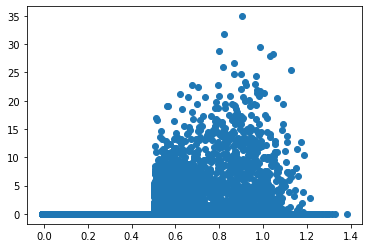

In [31]:
import matplotlib.pyplot as plt
plt.scatter(Da.loc[0:],control_outputs)

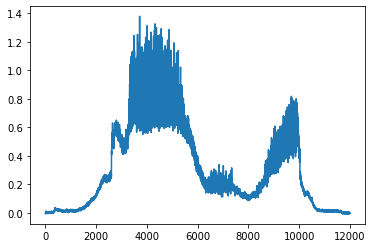

In [20]:
plt.plot(process_variables)